In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

# Fatal Police Shootings in the USA

In [8]:
median_house_hold_income = pd.read_csv('C:/Users/Bayram/Downloads/MedianHouseholdIncome2015.csv', encoding="windows-1252")

percentage_people_below_poverty_level = pd.read_csv('C:/Users/Bayram/Downloads/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")

percent_over_25_completed_highschool = pd.read_csv('C:/Users/Bayram/Downloads/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")

share_race_city = pd.read_csv('C:/Users/Bayram/Downloads/ShareRaceByCity.csv/ShareRacebyCity.csv', encoding="windows-1252")

kill = pd.read_csv('C:/Users/Bayram/Downloads/PoliceKillingsUS.csv', encoding="windows-1252")

In [9]:
percentage_people_below_poverty_level.head()


,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [10]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [11]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

poverty_rate
0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: count, Length: 771, dtype: int64

In [20]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

# Bar Plot

In [28]:
percentage_people_below_poverty_level['poverty_rate'].replace(['-'], 0.0, inplace=True)

In [29]:
percentage_people_below_poverty_level['poverty_rate'] = percentage_people_below_poverty_level['poverty_rate'].astype(float)

In [31]:
percentage_people_below_poverty_level['poverty_rate'].dtype

dtype('float64')

In [58]:
# area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
# area_list

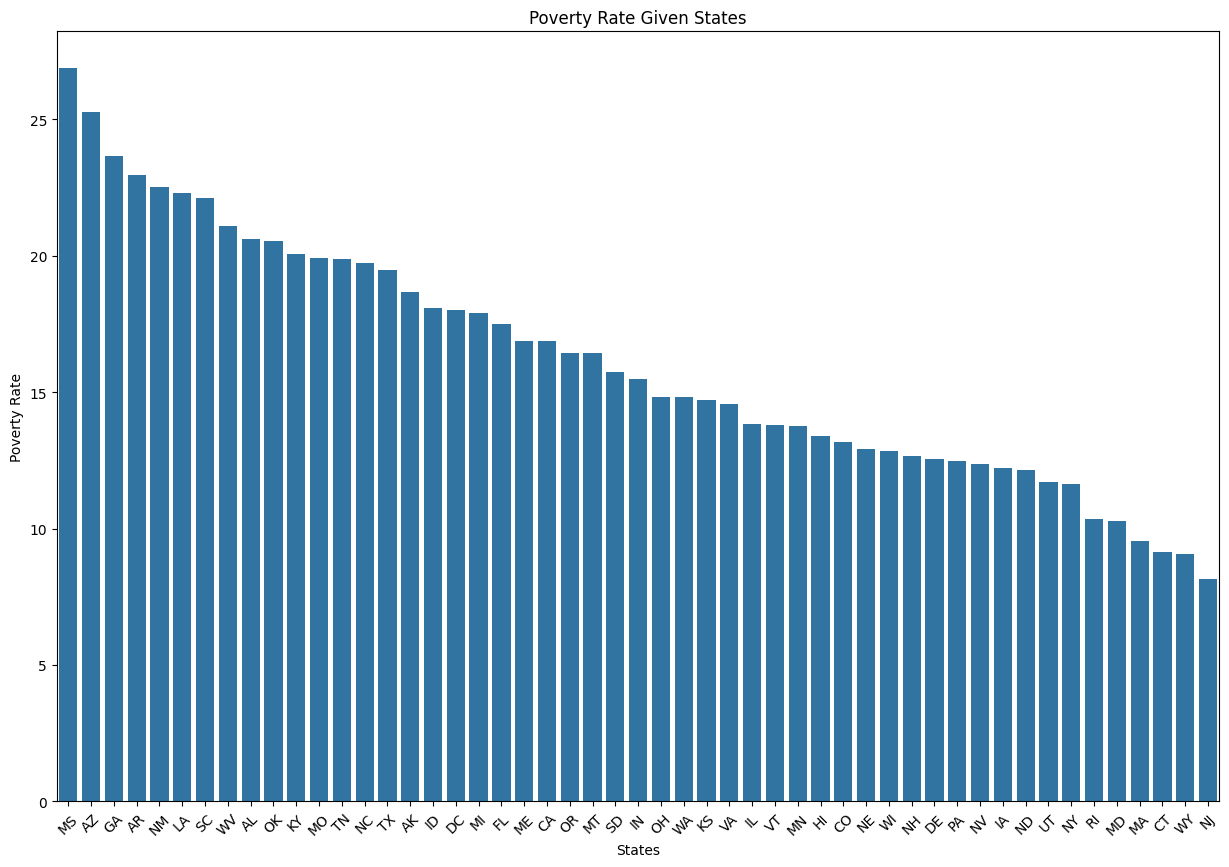

In [ ]:
poverty_list_of_states=percentage_people_below_poverty_level.groupby('Geographic Area')['poverty_rate'].aggregate(['sum', 'mean'])

poverty_list_of_states=poverty_list_of_states.sort_values(by='mean', ascending=False)


plt.figure(figsize=(15,10))

sns.barplot(x=poverty_list_of_states.index, y=poverty_list_of_states['mean'], data=poverty_list_of_states)

plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.show()

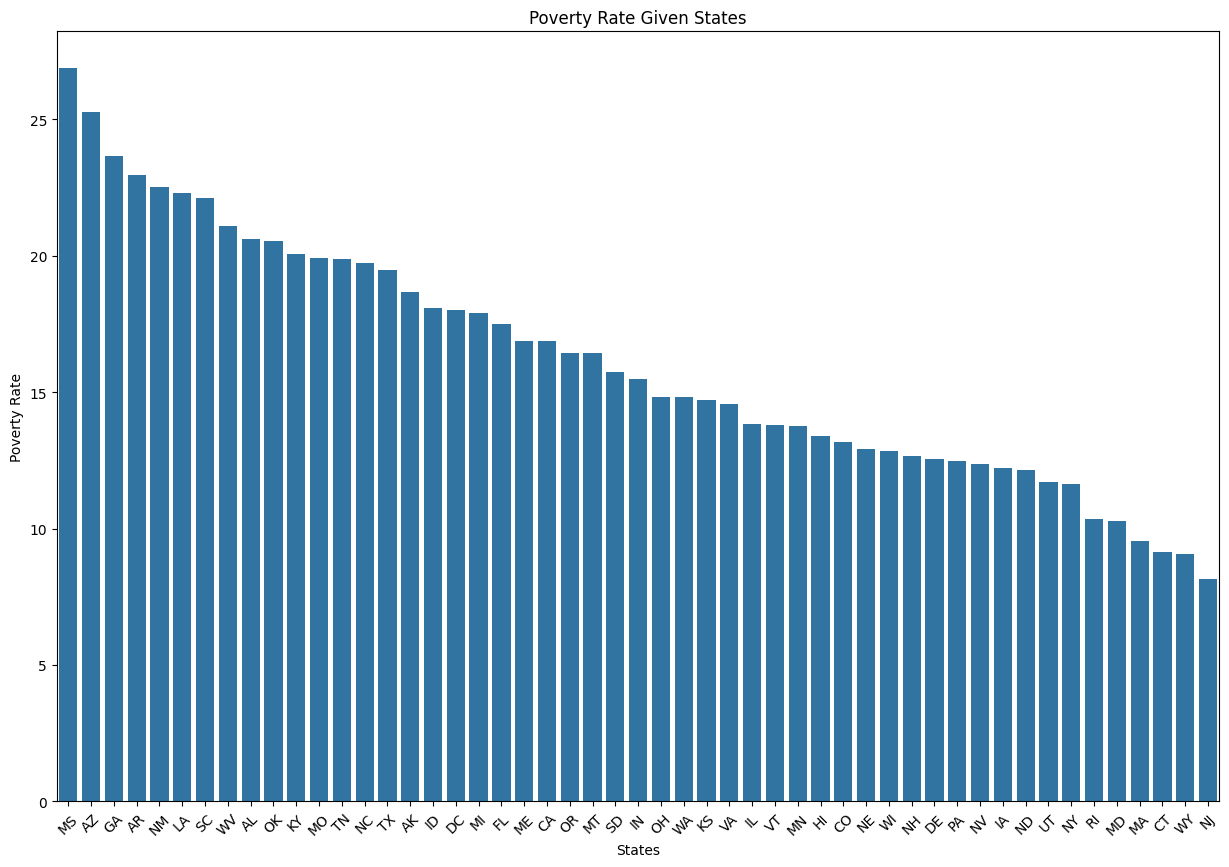

In [ ]:
poverty_list_of_states=percentage_people_below_poverty_level.groupby('Geographic Area')['poverty_rate'].mean()
poverty_list_of_states.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(15,10))

sns.barplot(data=poverty_list_of_states)

plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.show()

In [71]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [81]:
kill[kill['name']=='TK TK']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
928,1074,TK TK,10/12/15,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False
1397,1584,TK TK,01/06/16,shot,gun,NaN,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False
1419,1615,TK TK,09/06/16,shot,baton,NaN,M,NaN,Somerton,AZ,False,attack,Not fleeing,False
1500,1685,TK TK,04/07/16,shot,knife,NaN,M,NaN,Rosser,TX,False,other,Not fleeing,True
1646,1848,TK TK,01/09/16,shot and Tasered,pipe,NaN,M,H,Huntington Park,CA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False
1894,2110,TK TK,08/12/16,shot,gun,NaN,M,NaN,Allen,TX,False,attack,Not fleeing,False
1921,2141,TK TK,20/12/16,shot,knife,NaN,M,NaN,Brawley,CA,True,other,Not fleeing,False
1927,2154,TK TK,21/12/16,shot,knife,NaN,M,NaN,Stockton,CA,False,undetermined,Not fleeing,False
1933,2168,TK TK,23/12/16,shot,vehicle,NaN,M,NaN,El Monte,CA,False,other,Car,False


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Michael'),
  Text(1, 0, 'TK'),
  Text(2, 0, 'James'),
  Text(3, 0, 'David'),
  Text(4, 0, 'William'),
  Text(5, 0, 'Robert'),
  Text(6, 0, 'John'),
  Text(7, 0, 'Daniel'),
  Text(8, 0, 'Christopher'),
  Text(9, 0, 'Joseph'),
  Text(10, 0, 'Richard'),
  Text(11, 0, 'Jose'),
  Text(12, 0, 'Joshua'),
  Text(13, 0, 'Jason'),
  Text(14, 0, 'Charles')])

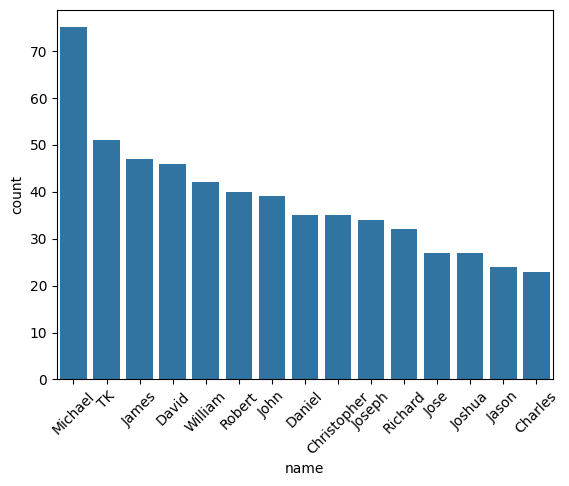

In [94]:
# sns.barplot(data=kill.value_counts().sort_values(ascending=False).head(15))

sns.barplot(data=kill['name'].apply(lambda x: x.split()[0]).value_counts().head(15))

plt.xticks(rotation=45)

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

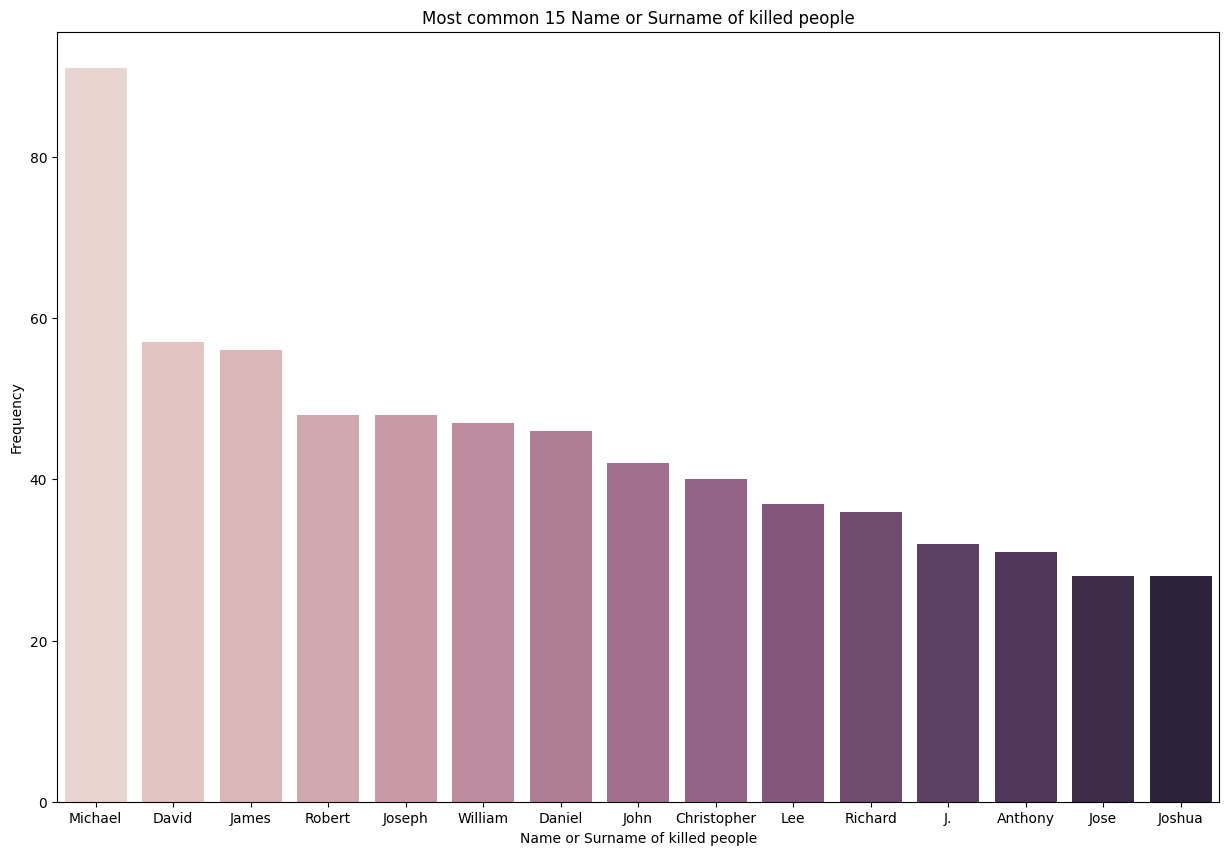

In [ ]:
# In File

separate = kill.name[kill.name != 'TK TK'].str.split()
a,b = zip(*separate)
name_list = a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)
#

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [97]:
percent_over_25_completed_highschool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [98]:
percent_over_25_completed_highschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [105]:
percent_over_25_completed_highschool['percent_completed_hs'].replace('-', 0.0, inplace=True)

percent_over_25_completed_highschool['percent_completed_hs'] = percent_over_25_completed_highschool['percent_completed_hs'].astype(float)

In [106]:
percent_over_25_completed_highschool['percent_completed_hs'].dtype

dtype('float64')

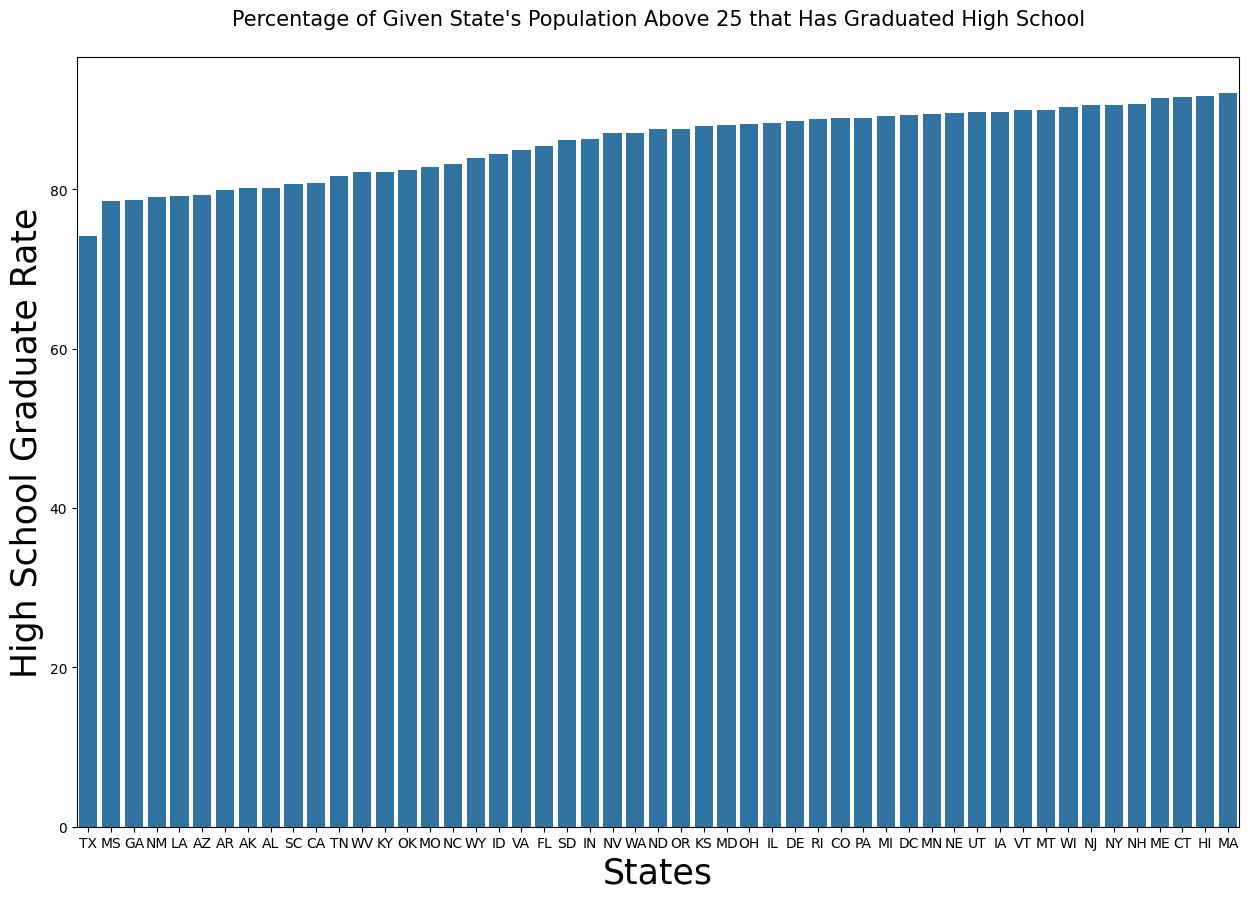

In [141]:
plt.figure(figsize=(15,10))

sns.barplot(percent_over_25_completed_highschool.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True))

plt.xlabel('States', fontsize=25)
plt.ylabel('High School Graduate Rate', fontsize=25)
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School\n", fontsize=15)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [142]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [143]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [144]:
share_race_city.isnull().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [163]:
share_race_city.replace('-', 0.0, inplace=True)
share_race_city.replace(' (X) ', 0.0, inplace=True)

In [170]:
share_race_city[['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']] = \
share_race_city[['share_white','share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(float)

In [171]:
share_race_city.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

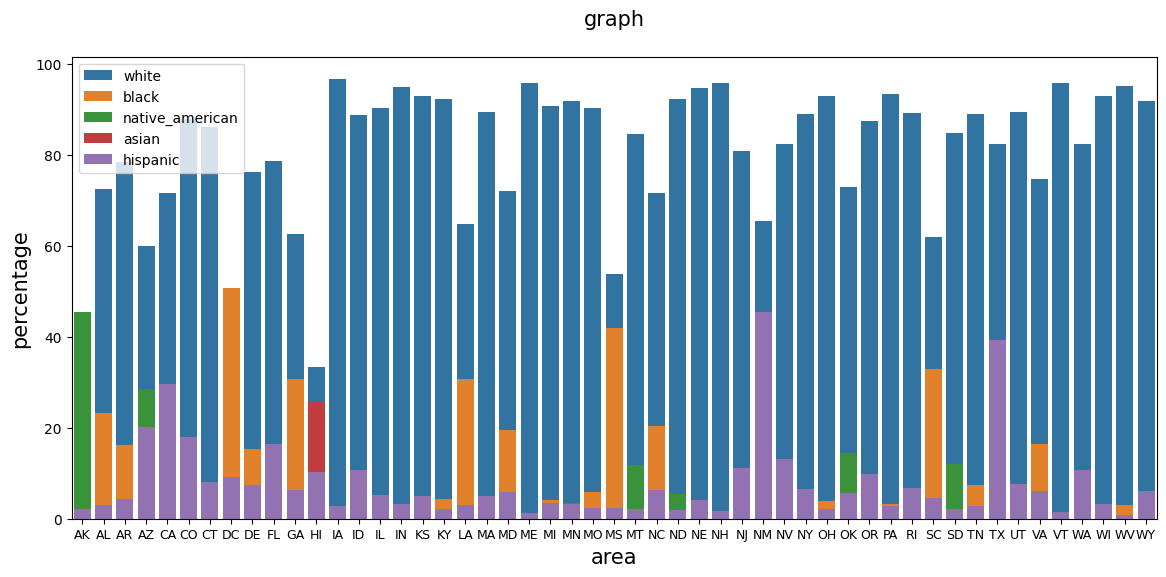

In [225]:
race_distribution = (share_race_city.groupby('Geographic area')[['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']].mean().reset_index())

race_distribution

width=0.1

plt.figure(figsize=(14,6))

sns.barplot(x=race_distribution['Geographic area'], y=race_distribution['share_white'], label='white')
sns.barplot(x=race_distribution['Geographic area'], y=race_distribution['share_black'], label='black')
sns.barplot(x=race_distribution['Geographic area'], y=race_distribution['share_native_american'], label='native_american')
sns.barplot(x=race_distribution['Geographic area'], y=race_distribution['share_asian'], label='asian')
sns.barplot(x=race_distribution['Geographic area'], y=race_distribution['share_hispanic'], label='hispanic')

plt.ylabel('percentage', fontsize=15)
plt.xlabel('area', fontsize=15)
plt.title('graph\n', fontsize=15)

plt.xticks(fontsize=9)
plt.show()

In [226]:
# Point Plot

In [257]:
percent_hs_per_state = (percent_over_25_completed_highschool.groupby('Geographic Area')['percent_completed_hs'].mean())
percent_pr_per_state = (percentage_people_below_poverty_level.groupby('Geographic Area')['poverty_rate'].mean())

df = pd.merge(left=percent_hs_per_state, right=percent_pr_per_state, on='Geographic Area')
df.sort_values(by='poverty_rate', ascending=False)

# df.plot()

df.head()

,percent_completed_hs,poverty_rate
Geographic Area,,
AK,80.098028,18.678592
AL,80.163419,20.611795
AR,79.949538,22.963216
AZ,79.218182,25.268071
CA,80.824639,16.888371


In [259]:
percent_over_25_completed_highschool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
percentage_people_below_poverty_level.head()

df = pd.merge(left=percent_over_25_completed_highschool, right=percentage_people_below_poverty_level, on='City')
sns.countplot(y=df['percent_completed_hs'], data=df)

# no